In [2]:
#Load walmart dataset
import pandas as pd
data=pd.read_csv("/content/Walmart_Store_sales.csv")
#Import Necessary Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In this project, we focused to answer the following questions:

1. Which store has minimum and maximum sales?
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
3. Which store/s has good quarterly growth rate in Q3’2012
Some holidays have a negative impact on sales. 
4. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights
6. Build prediction to forecast demand.



In [3]:
#Find number of walmart stores
data.head()
res=len(set(data['Store']))
print(res)

45


In [4]:
#Looking at the data
data.head()
#Checking if our dataset containe null values
data.isnull().sum()
#There are no Null Values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Data Understanding

There are sales data available for 45 stores of Walmart in Kaggle. This is the data that covers sales from 2010-02-05 to 2012-11-01.

The data contains these features:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Data Preparation

In [5]:
# Convert date to datetime format and show dataset information
data['Date'] =  pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
# Splitting Date and create new columns (Day, Month, and Year)
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


# Q.1 Which store has minimum and maximum sales?

The store having Maximum Sales is : 20
The store having Minimum Sales is : 33
<class 'numpy.float64'>


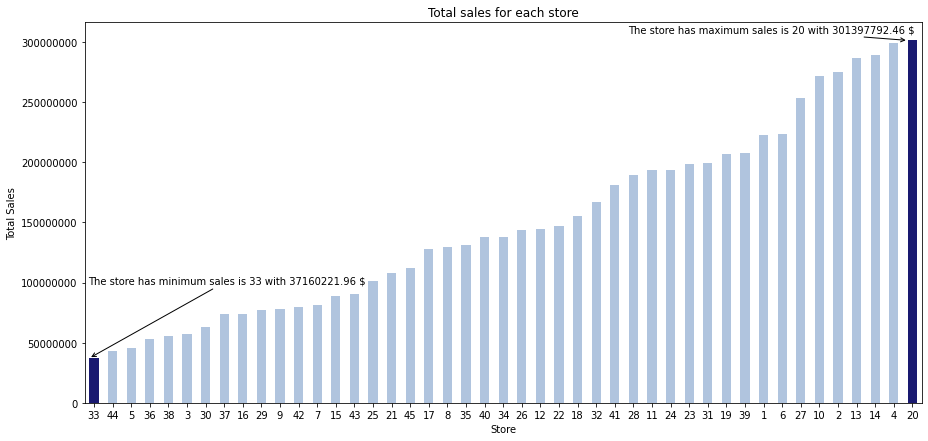

In [7]:
#Method 1 :- By making a dictionary and then finding the max and min Sales
rem=len(data['Store'])
sales=[]
dic={}
for i in range(0,rem):
  if data['Store'][i] not in dic.keys():
    dic[data['Store'][i]]=data['Weekly_Sales'][i]
  else:
     dic[data['Store'][i]]+=data['Weekly_Sales'][i]
cnt=0
mx=0
mn=1e10
ans1=0
ans2=0
for i,j in dic.items():
  if j>mx:
    mx=j
    ans1=i
for i,j in dic.items():
  if j<mn:
    mn=j
    ans2=i
print("The store having Maximum Sales is :",ans1)
print("The store having Minimum Sales is :",ans2)

#Method 2:- Graphically
plt.figure(figsize=(15,7))


# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');



  




 Q.2 Which store has maximum standard deviation i.e., the sales vary a lot.
 Also, find out the coefficient of mean to standard deviation?

In [8]:
# Method-1
import numpy as np
import pandas as pd
data['Store'].value_counts()
std_list=[]
cnt=0
mean_list=[]
for i in range(1,45):
   a=[]
   for j in range(0,143):
       res=(data[data['Store']==i]['Weekly_Sales'][cnt])
       a.append(res)
       cnt=cnt+1
   std_list.append(np.std(a))
   mean_list.append(np.mean(a))
mx=0
result=[]
for i in range(len(std_list)):
  if std_list[i]>mx:
    mx=std_list[i]
    ret=i
for i in range(len(mean_list)):
  result.append(std_list[i]/mean_list[i])
# result list will store the values of coefficient of mean to standard deviation
print("The store having maximum standard deviation is :",ret+1)
print(result)

The store having maximum standard deviation is : 14
[0.0999408357081771, 0.12299156720564293, 0.1146185290319992, 0.1266374152725469, 0.11825278836063026, 0.1353471207557374, 0.1966135996968848, 0.11654318873634893, 0.12645099879377864, 0.15857610369755093, 0.12183359468888892, 0.13744221956273658, 0.13204948069400355, 0.1565863429488463, 0.192706633729916, 0.16460208695319026, 0.12508101797248644, 0.16227510863890038, 0.13221538496995303, 0.13044418093151547, 0.16969591961518754, 0.15623372216503525, 0.17909165111910935, 0.12320431967333707, 0.1593004693299032, 0.10972498522926637, 0.13468204440572068, 0.1368487253164096, 0.18309888416863046, 0.05182587323723126, 0.08984525112455868, 0.1178960929691217, 0.0925430687099248, 0.10784616451867972, 0.22887662416388083, 0.16200945742452347, 0.041936713528847466, 0.11048709039759921, 0.1493827183948949, 0.12299745115463655, 0.1476581016905653, 0.09001891616458202, 0.06387909747954962, 0.0815068182099345]


In [9]:
# Method-2(Graphically)
# Which store has maximum standard deviation?
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} $".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))

The store has maximum standard deviation is 14 with 317570 $


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


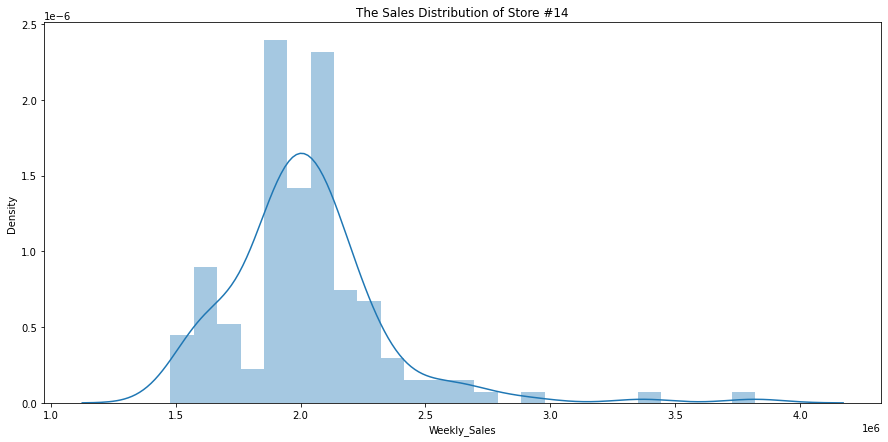

In [10]:
# Distribution of store has maximum standard deviation
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(data_std.head(1).index[0]));

In [11]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


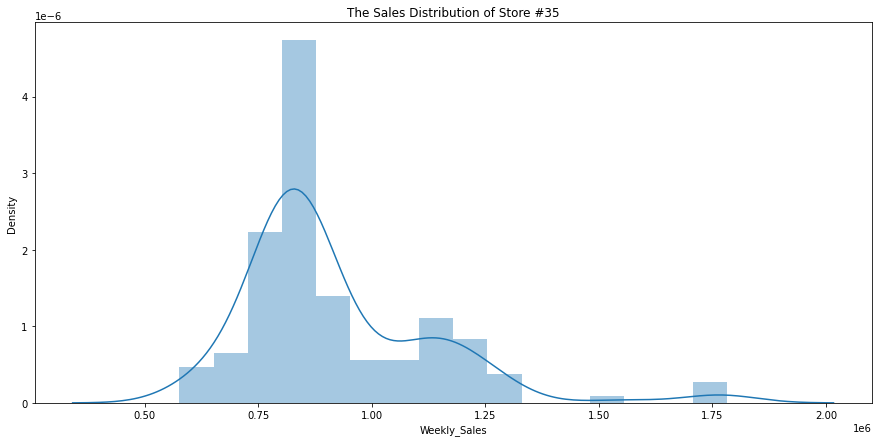

In [12]:
# Distribution of store has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));

Q3: Which store/s has good quarterly growth rate in Q3’2012

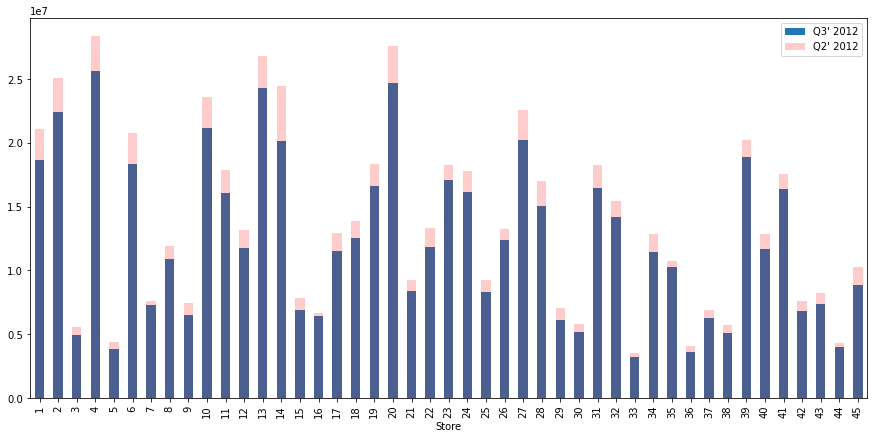

In [13]:
# Method-1
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2012
Q3 = data[(data['Date'] > '2012-07-01') & (data['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = data[(data['Date'] > '2012-04-01') & (data['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);

In [14]:
#  store/s has good quarterly growth rate in Q3’2012 - .sort_values(by='Weekly_Sales')
print('Store have good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

Store have good quarterly growth rate in Q3’2012 is Store 4 With 25652119.35 $


In [15]:
# Method-2 
ans=0
res=0
Q3=np.array(Q3)
cnt=0
for i in Q3:
  cnt=cnt+1
  if i>ans:
    ans=i
    res=cnt
print("Store having most good Quarterly sales(Q3) is :",res)

Store having most good Quarterly sales(Q3) is : 4


Q.4 Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

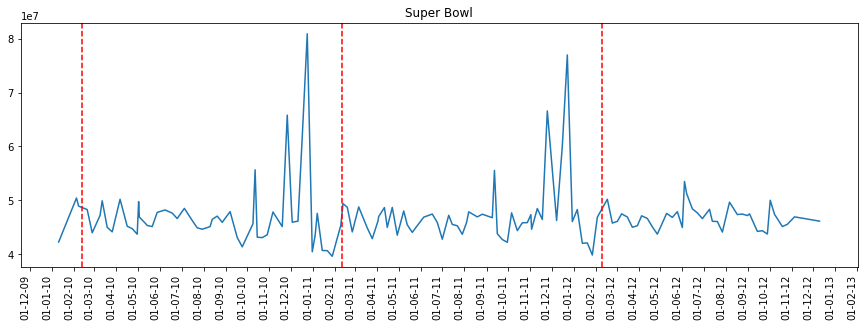

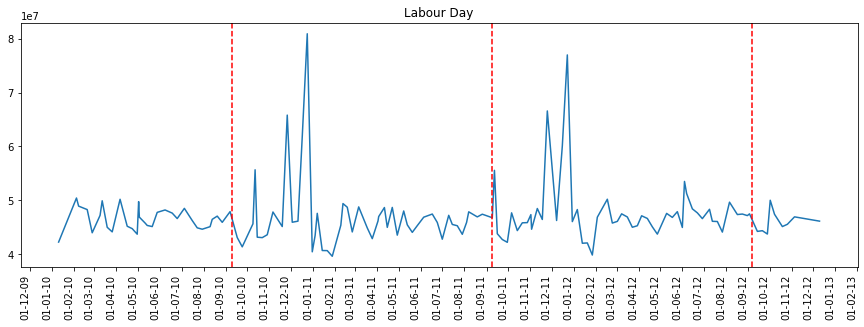

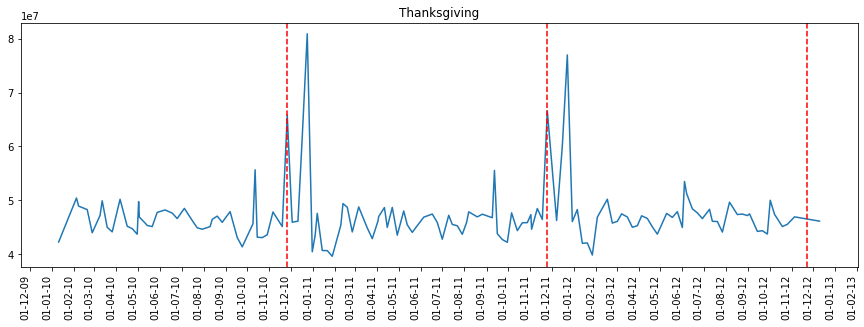

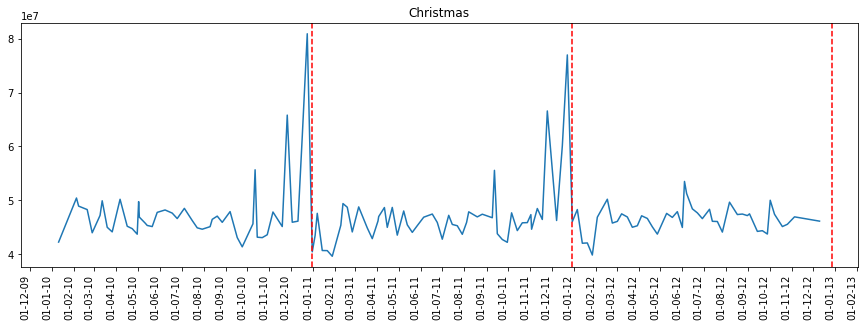

In [16]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

The sales increased during thanksgiving. And the sales decreased during christmas.

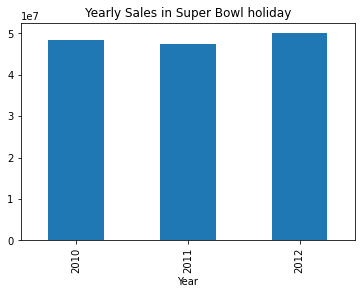

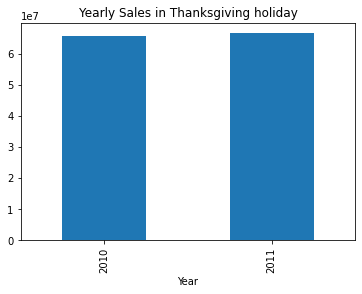

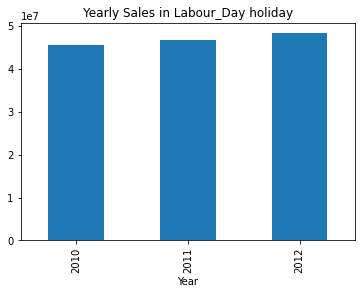

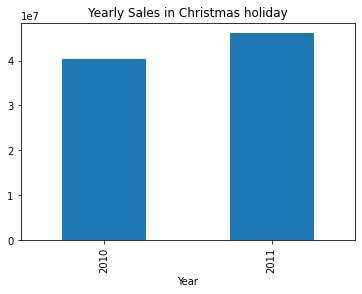

In [17]:
#Analysis the yearly Sales on Different holidays like SuperBowl,Thanksgiving
Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(data.loc[data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday') 
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday') 
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')

In [18]:
#Calculating the total sales on each holiday for all the years
Super_Bowl=np.array(Super_Bowl_df)
total_sales=0
for i in Super_Bowl:
  total_sales=total_sales+i
print("Total sales in Super_Bowl is:",total_sales)
Thanksgiving=np.array(Thanksgiving_df)
total_sales=0
for i in Thanksgiving:
  total_sales=total_sales+i
print("Total sales in Thanksgiving is:",total_sales)
Labour_Day=np.array(Labour_Day_df)
total_sales=0
for i in Labour_Day:
  total_sales=total_sales+i
print("Total sales in Labour_Day is:",total_sales)
Christmas=np.array(Christmas_df)
total_sales=0
for i in Christmas:
  total_sales=total_sales+i
print("Total sales in Christmas is:",total_sales)


Total sales in Super_Bowl is: [1.45682278e+08]
Total sales in Thanksgiving is: [1.32414608e+08]
Total sales in Labour_Day is: [1.40727685e+08]
Total sales in Christmas is: [86474980.03999999]


We can see that for Super_bowl we have combined largest sales for all years

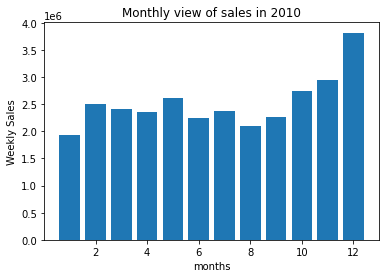

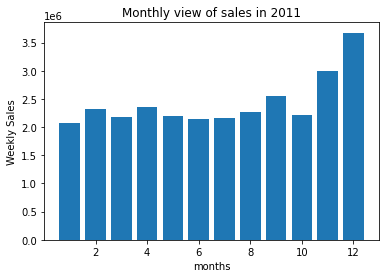

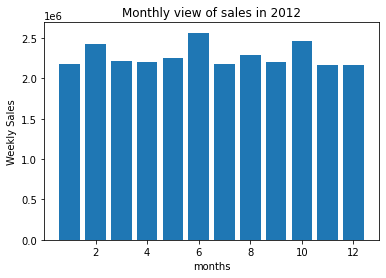

In [19]:
# Monthly view of sales for each years
plt.bar(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.bar(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.bar(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

<Figure size 720x432 with 0 Axes>

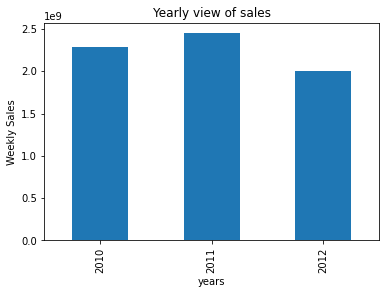

In [20]:
# Yearly view of sales
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

Build Prediction Model to forecast demand 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

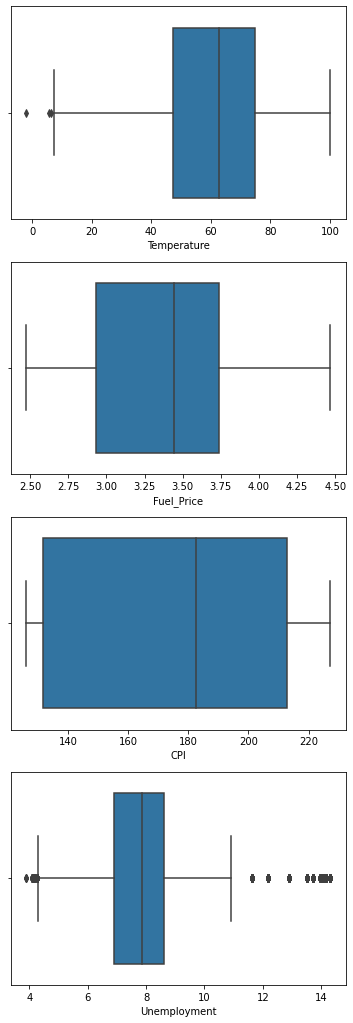

In [21]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i])

In [22]:
# drop the outliers     
data_new = data[(data['Unemployment']<10) & (data['Unemployment']>4.5) & (data['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

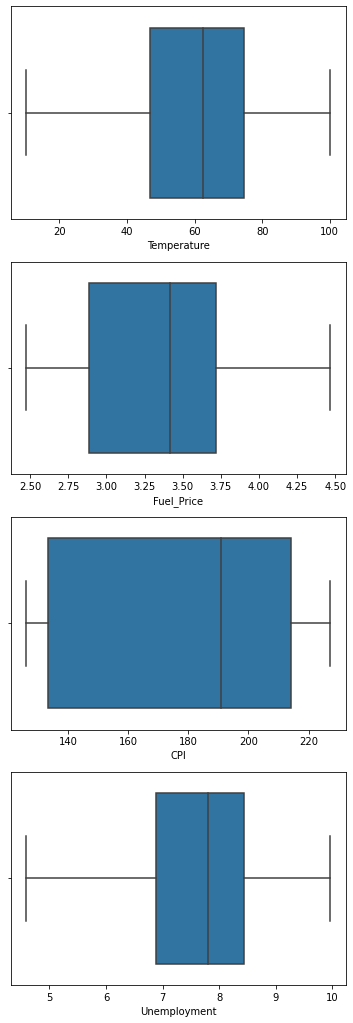

In [23]:
# check outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

Model Implementation:-

We will be looking at following Algorithms

**Improved Linear regression models**

1.Ridge regression

2.Lasso regression


**Nearest neighbour Regressor**

3.KNeighborsRegressor

**Ensemble models**

4.Random Forest Regressor

5.Gradient Boosting Regressor

6.ExtraTrees Regressor

In [24]:
from sklearn.model_selection import train_test_split
# Select features and target 
x = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [25]:
#Ridge Model
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
print('score of ridge_model on test_data', ridge.score(x_test,y_test))

score of ridge_model on test_data 0.12844293245998228


In [26]:
#Lasso Model
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
print('score of lasso model on test_data',lasso.score(x_test,y_test))

score of lasso model on test_data 0.12844473914656374


In [27]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
k_model=KNeighborsRegressor()
k_model.fit(x_train,y_train)
y_pred=k_model.predict(x_test)
print('score of KneigborsRegressor is ',k_model.score(x_test,y_test))

score of KneigborsRegressor is  0.6653319972994909


In [28]:
#RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
print('score of rf_model is ',rf_model.score(x_test,y_test))

score of rf_model is  0.9625150567163301


In [29]:
#Boosting model
import xgboost as xgb
from xgboost import plot_importance
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(x_train, y_train)
y_pred=model_xgb.predict(x_test)
print('score of xgb_model is ',model_xgb.score(x_test,y_test))


score of xgb_model is  0.923492797040262


In [30]:
#ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
extra_reg=ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)
y_pred=extra_reg.predict(x_test)
print('score of extra_tree_model is ',extra_reg.score(x_test,y_test))


score of extra_tree_model is  0.9604007926891598


In [31]:
#LGBMRegressor
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(num_leaves=41, n_estimators=200)
model_lgb.fit(x_train, y_train)
y_pred=model_lgb.predict(x_test)
print('score of LGBM_Regressor is ',model_lgb.score(x_test,y_test))

score of LGBM_Regressor is  0.9831184134432359


Model Evaluation, Cross-validation & Selection

In [32]:
#Function to Evaluate the models
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [33]:
evaluate(ridge, x_test, y_test)
evaluate(lasso, x_test, y_test)
evaluate(k_model, x_test, y_test)
evaluate(rf_model, x_test, y_test)
evaluate(model_xgb, x_test, y_test)
evaluate(extra_reg, x_test, y_test)
evaluate(model_lgb, x_test, y_test)

Ridge() 

Average Error       : 443317.0938 degrees
Variance score R^2  : 12.84%
Accuracy            : 35.46%

Lasso() 

Average Error       : 443313.0608 degrees
Variance score R^2  : 12.84%
Accuracy            : 35.46%

KNeighborsRegressor() 

Average Error       : 228860.6190 degrees
Variance score R^2  : 66.53%
Accuracy            : 67.78%

RandomForestRegressor(random_state=1) 

Average Error       : 59767.0682 degrees
Variance score R^2  : 96.25%
Accuracy            : 94.30%

XGBRegressor(objective='reg:squarederror') 

Average Error       : 118008.9050 degrees
Variance score R^2  : 92.35%
Accuracy            : 84.68%

ExtraTreesRegressor() 

Average Error       : 62015.5419 degrees
Variance score R^2  : 96.04%
Accuracy            : 94.00%

LGBMRegressor(n_estimators=200, num_leaves=41) 

Average Error       : 47385.1554 degrees
Variance score R^2  : 98.31%
Accuracy            : 94.63%



Model Performance on test_data

In [34]:
y1_pred = ridge.predict(x_test)
y2_pred = lasso.predict(x_test)
y4_pred = k_model.predict(x_test)
y5_pred = rf_model.predict(x_test)
y6_pred = model_lgb.predict(x_test)
y7_pred = model_xgb.predict(x_test)
y8_pred = extra_reg.predict(x_test)

Prediction of each model vs Test data

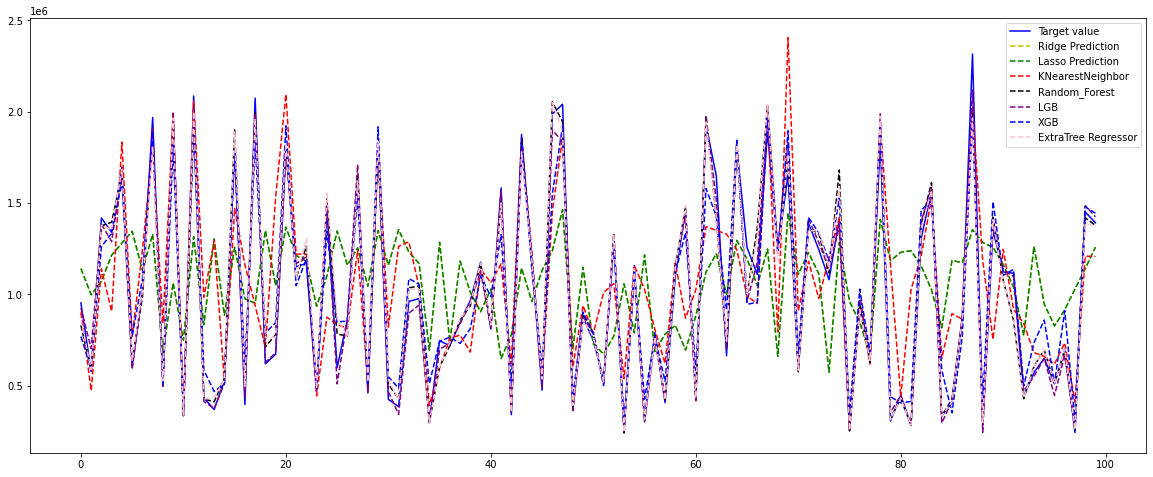

In [35]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Ridge Prediction ', linestyle='--', color='y')
plt.plot(y2_pred[:100],label='Lasso Prediction ', linestyle='--', color='g')
plt.plot(y4_pred[:100],label='KNearestNeighbor', linestyle='--', color='r')
plt.plot(y5_pred[:100],label='Random_Forest', linestyle='--', color='black')
plt.plot(y6_pred[:100],label='LGB', linestyle='--', color='purple')
plt.plot(y7_pred[:100],label='XGB', linestyle='--', color='blue')
plt.plot(y8_pred[:100],label='ExtraTree Regressor', linestyle='--', color='pink')

plt.legend(loc=1)

 LGBM is performing the best with accuracy of 94.63%

HyperParameter tuning for LGBM model

In [57]:
evaluate(r_grid, x_test, y_test)

AttributeError: ignored

In [54]:
y_pred=g_search.predict(x_test)
evaluate(g_search, x_test, y_test)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True) 

Average Error       : 63613.0948 degrees
Variance score R^2  : 95.52%
Accuracy            : 93.98%



{'max_depth': 10,
 'min_child_samples': 30,
 'min_child_weight': 0.001,
 'n_estimators': 40,
 'num_leaves': 10,
 'reg_alpha': 0,
 'reg_lambda': 0}

GridSearchCV(cv=4, estimator=LGBMRegressor(random_state=40), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_child_samples': [10, 20, 30],
                         'min_child_weight': [0.001, 0.01, 0.1, 1, 10.0, 100.0,
                                              1000.0],
                         'n_estimators': [10, 20, 30, 40],
                         'num_leaves': [1, 2, 4, 6, 7, 8, 10],
                         'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10, 50],
                         'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50]},
             scoring='r2', verbose=2) 

Average Error       : 149133.3838 degrees
Variance score R^2  : 88.43%
Accuracy            : 79.22%

